## Импорты, открываем Dump

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import math
import matplotlib.pyplot as plt
import datetime
now = datetime.datetime.now().strftime('%Y-%m-%d %H.%M.%S')
os.chdir(r"C:\price_set")
print('Открываем Dump')
dump = pd.read_csv('dump.csv', sep = ';',encoding = 'cp1251', low_memory=False, skiprows = 1)

Открываем Dump


In [2]:
float_columns = [ 'Цена :: Цена Пенза','Цена :: Цена Екатеринбург',
                 'Цена :: Цена Жуковка', 'Цена :: Цена Secrets', 'Цена :: Цена Кутузовский',
                'Цена :: Цена премиум магазина','Цена :: Цена обычного магазина','Внутренний штрихкод',
                'Ставка НДС','Количество в упаковке']
for column in float_columns:
    print(column)
    dump[column] = dump[column].astype(np.float16)



Цена :: Цена Пенза
Цена :: Цена Екатеринбург
Цена :: Цена Жуковка
Цена :: Цена Secrets
Цена :: Цена Кутузовский
Цена :: Цена премиум магазина
Цена :: Цена обычного магазина
Внутренний штрихкод
Ставка НДС
Количество в упаковке


## Открываем остальные таблицы, предобработка

In [3]:
print('Открываем products')
purchase_price = pd.read_csv('products.csv', sep = ';', header = 0, encoding = 'cp1251', low_memory=False)
groups = pd.read_csv('groups.csv', sep = ';', header = 0, encoding = 'cp1251')
display(groups)
display(groups.info())
purchase_price = purchase_price.loc[:, ['id', 'Точка Любви - Розница:Цена']]
purchase_price = purchase_price.astype(float)
purchase_price = purchase_price.astype(int)
print('Открываем black')
black = pd.read_csv('black.csv', sep = ';', header = 0, encoding = 'cp1251', low_memory=False)
print('Открываем promo')
promo_list = pd.read_csv('promo.csv', sep = ';', header = 0, encoding = 'cp1251')
dump = dump.drop(columns = ['Новое название товара', 'Внешний ID', 'Активен', 
                            'Количество в упаковке', 'Штрихкоды','Ставка НДС', 'Гибкое поле 1',
                           'Гибкое поле 2', 'Гибкое поле 3', 'Гибкое поле 4', 'Гибкое поле 5',
                           'Гибкое поле 6', 'Гибкое поле 7', 'Гибкое поле 8', 'Гибкое поле 9',
                           'Гибкое поле 10', 'Гибкое поле 11', 'Гибкое поле 12', 'Гибкое поле 13',
                           'Гибкое поле 14', 'Гибкое поле 15', 'Внутренний штрихкод', 'Описание', 'Группы'
                            ,'Цена :: тест ','Цена :: Цена Санкт-Петербург'])

Открываем products


,Товар ID,Артикул,Название,Группа 1,Группа 2,Группа 3,ЦС
0,40085,56631,"56631 We-Vibe Touch, фиолетовый. Эргономичный ...",Игрушки для женщин,Женские вибраторы,Минивибраторы,A
1,40633,86495,"86495 Лаверон, 1 шт. Природный стимулятор для ...",Возбуждающие средства,БАДы,Для женщин,С
2,40811,21180,21180 Фанты Карамельный рай. Для чувственности...,Приколы,Игры,Игры,A
3,40824,20101,20101 Фанты Шуры-Муры. Для непринужденного общ...,Приколы,Игры,Игры,B
4,42565,10757,10757 Pipedream Vibrating Silicone Nipple Teaz...,Фетиш и БДСМ,"Расширители, зажимы и вытяжки","Расширители, зажимы и вытяжки",B
...,...,...,...,...,...,...,...
16986,42327,97979,"97979 Ann Devine Tassel Pasties, золотой. С дв...",Белье,Эротические аксессуары,"Накладки на соски, пэстисы",B
16987,41662,97993,"97993 BDSM Арсенал трусики, черные. Для фиксац...",Страпоны,Трусики и крепления,Трусики и крепления,С
16988,41668,98003,98003 BDSM Арсенал ошейник. С контрастной вста...,Фетиш и БДСМ,Ошейники,Ошейники,B
16989,41671,98006,98006 BDSM Арсенал ошейник. С контрастной вста...,Фетиш и БДСМ,Ошейники,Ошейники,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16991 entries, 0 to 16990
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Товар ID  16991 non-null  object
 1   Артикул   16991 non-null  int64 
 2   Название  16991 non-null  object
 3   Группа 1  16991 non-null  object
 4   Группа 2  16991 non-null  object
 5   Группа 3  16991 non-null  object
 6   ЦС        16991 non-null  object
dtypes: int64(1), object(6)
memory usage: 929.3+ KB


None

Открываем black
Открываем promo


## Перевод в цельночисленные значения

In [4]:
dump = dump.fillna(0)
columns_names = ['Цена :: Цены интернет-магазина', 'Цена :: Балансовая стоимость']


# columns_names = ['Цена :: Цены интернет-магазина','Цена :: Цена обычного магазина','Цена :: Цена премиум магазина',
#                 'Цена :: Балансовая стоимость','Цена :: Цена Кутузовский','Цена :: Цена Secrets',
#                 'Цена :: Цена Жуковка','Цена :: Цена Екатеринбург', 'Цена :: Цена Пенза']

def comma_replace (x):
    if x == 0:
        None
    else:
        x = str(x.replace(',','.'))
    return x
 
for column in columns_names:
    dump[column] = dump[column].apply(comma_replace)



for column in columns_names:
    dump[column] = dump[column].astype(float)
    dump[column] = dump[column].astype(int)
del columns_names

In [5]:
dump['Артикул'] = dump['Артикул'].fillna(0)
dump = dump[dump['Артикул'] != 0]
dump['Артикул'] = dump['Артикул'].astype(int)

In [6]:
## Обьединение по артикулу

print('Обьединяем все таблицы')
print(1)
dump = dump.merge(black, on ='Артикул', how = 'left')
print(2)
dump = dump.query('black != "black"')
print(3)
dump = dump.merge(promo_list, on ='Артикул', how = 'left')
print(4)
purchase_price = purchase_price.rename(columns={'id':'Артикул',
                                                'Точка Любви - Розница:Цена':'Цена Закупки'})
print(5)
dump = dump.merge(purchase_price, on ='Артикул', how = 'left')
print(6)
dump = dump.merge(groups, on ='Артикул', how = 'left')
print(7)
marginality_storage = {'Игрушки для женщинA':0.5,
                       'Возбуждающие средстваС':0.5, 
                       'ПриколыA+':0.5,
                       'ПриколыB':0.5,
                       'Фетиш и БДСМB':0.5, 
                       'БельеB':0.5,
                       'Возбуждающие средстваB':0.5,
                       'БельеС':0.5, 
                       'БельеA':0.5,
                       'БельеA+':0.5,
                       'Возбуждающие средстваA':0.5,
                       'Игрушки для женщинС':0.5,
                       'Игрушки для мужчинС':0.5, 
                       'СтрапоныС':0.5,
                       'Фетиш и БДСМA':0.5,
                       'Фетиш и БДСМС':0.5, 
                       'ПриколыС':0.5,
                       'Духи с феромонамиB':0.5, 
                       'Игрушки для парС':0.5,
                       'Игрушки для женщинB':0.5, 
                       'Игрушки для мужчинB':0.5,
                       'Фетиш и БДСМA+':0.5, 
                       'Анальная стимуляцияA':0.5,
                       'СтрапоныB':0.5, 
                       'Анальная стимуляцияB':0.5,
                       'Игрушки для мужчинA+':0.5, 
                       'Игрушки для парB':0.5,
                       'Духи с феромонамиA':0.5, 
                       'Гели и смазкиA':0.5,
                       'Игрушки для мужчинA':0.5, 
                       'Игрушки для парA+':0.5,
                       'Анальная стимуляцияС':0.5, 
                       'Гели и смазкиС':0.5,
                       'Духи с феромонамиС':0.5, 
                       'Игрушки для парA':0.5,
                       'Духи с феромонамиA+':0.5, 
                       'Гели и смазкиB':0.5,
                       'Игрушки для женщинA+':0.5, 
                       'ПриколыA':0.5,
                       'Гели и смазкиA+':0.5, 
                       'Анальная стимуляцияA+':0.5,
                       'СтрапоныA+':0.5,
                       'СтрапоныA':0.5, 
                       'ПрезервативыA':0.5,
                       'ПрезервативыB':0.5,
                       'ПрочееB':0.5, 
                       'ПрочееС':0.5,
                       'ПрезервативыС':0.5,
                       'ПрезервативыA+':0.5, 
                       'Возбуждающие средстваA+':0.5,
                       'ПрочееA':0.5,
                       'ПрочееA+':0.5,
                       'Яйца' : 0.5,
                       'Женское здоровье': 0.5,
                      }
# dump = dump.drop(columns = ['Цена :: Цена Челябинск'])
del purchase_price, groups, promo_list, black


Обьединяем все таблицы
1
2
3
4
5
6
7


## Функция сложения Группы + ЦС, фильтруем весь датасет

In [7]:
print('Фильтруем Датасет')
def сцепка (row):
    
    problems = ['Яйца', 'Женское здоровье']
    group_1 = row['Группа 1']
    group_2 = row['Группа 2']
    price_group = row['ЦС']
    if group_2 in problems:
        return group_2
    else:
        return group_1 + price_group
dump['сцепка'] = dump.apply(сцепка, axis=1)
dump = dump.rename(columns = {'товар или promo': 'to_sell',
                             'Группа 1': 'group_1',
                             'Группа 2' : 'group_2'})
dump['сцепка'] = dump['сцепка'].fillna('None')
display(dump[dump['Артикул'] == 14211])
dump = dump.query('black != "black" & to_sell == "товар" & сцепка != "None" & group_1 != "Тестеры/Промо" & Производитель != "Play Secrets"')

dump = dump[dump['Цена Закупки'] > 29]

Фильтруем Датасет


,Название товара *,# Товара,Артикул,Производитель,Цена :: Цены интернет-магазина,Цена :: Цена обычного магазина,Цена :: Цена премиум магазина,Цена :: Балансовая стоимость,Цена :: Цена Кутузовский,Цена :: Цена Secrets,...,black,to_sell,Цена Закупки,Товар ID,Название,group_1,group_2,Группа 3,ЦС,сцепка


## Ценообразование

In [8]:
#Обычный прайс-лист
def common_price(row):
    purchase_prace = row['Цена Закупки']
    group = row['сцепка']
    intermediate_price = purchase_prace/(1 - marginality_storage[group])
    final_price = 0
    if intermediate_price == 900:
        final_price = 899
    elif intermediate_price < 900:
        final_price = math.ceil(intermediate_price/50)*50+49
    elif intermediate_price > 900:
        final_price = math.ceil(intermediate_price/100)*100+99
    return final_price

#Премиум прайс-лист
def premium_price(row):
    purchase_prace = row['Цена Закупки']
    group = row['сцепка']
    intermediate_price = (purchase_prace/(1 - marginality_storage[group]))
    final_price = 0
    if intermediate_price == 900:
        final_price = 899
    elif intermediate_price < 900:
        final_price = math.ceil(intermediate_price/50)*50+49
    elif intermediate_price > 900:
        final_price = math.ceil(intermediate_price/100)*100+99
    return final_price

#Кутузовский прайс-лист
def kutuzovskiy_price(row):
    purchase_prace = row['Цена Закупки']
    group = row['сцепка']
    intermediate_price = (purchase_prace/(1 - marginality_storage[group]))
    final_price = 0
    if intermediate_price == 900:
        final_price = 899
    elif intermediate_price < 900:
        final_price = math.ceil(intermediate_price/50)*50+49
    elif intermediate_price > 900:
        final_price = math.ceil(intermediate_price/100)*100+99
    return final_price

#Secrets прайс-лист
def secrets_price(row):
    purchase_prace = row['Цена Закупки']
    group = row['сцепка']
    intermediate_price = purchase_prace/(1 - marginality_storage[group])
    final_price = 0
    if intermediate_price == 900:
        final_price = 899
    elif intermediate_price < 900:
        final_price = math.ceil(intermediate_price/50)*50+49
    elif intermediate_price > 900:
        final_price = math.ceil(intermediate_price/100)*100+99
    return final_price

#Жуковка прайс-лист
def zhukovka_price(row):
    purchase_prace = row['Цена Закупки']
    group = row['сцепка']
    intermediate_price = (purchase_prace/(1 - marginality_storage[group]))
    final_price = 0
    if intermediate_price == 900:
        final_price = 899
    elif intermediate_price < 900:
        final_price = math.ceil(intermediate_price/50)*50+49
    elif intermediate_price > 900:
        final_price = math.ceil(intermediate_price/100)*100+99
    return final_price

#Екатеринбург прайс-лист
def ekaterinburg_price(row):
    purchase_prace = row['Цена Закупки']
    group = row['сцепка']
    intermediate_price = purchase_prace/(1 - marginality_storage[group])
    final_price = 0
    if intermediate_price == 900:
        final_price = 899
    elif intermediate_price < 900:
        final_price = math.ceil(intermediate_price/50)*50+49
    elif intermediate_price > 900:
        final_price = math.ceil(intermediate_price/100)*100+99
    return final_price

#Пенза прайс-лист
def penza_price(row):
    purchase_prace = row['Цена Закупки']
    group = row['сцепка']
    intermediate_price = (purchase_prace/(1 - marginality_storage[group]))
    final_price = 0
    if intermediate_price == 900:
        final_price = 899
    elif intermediate_price < 900:
        final_price = math.ceil(intermediate_price/50)*50+49
    elif intermediate_price > 900:
        final_price = math.ceil(intermediate_price/100)*100+99
    return final_price

def internet_price(row):
    purchase_prace = row['Цена Закупки']
    group = row['сцепка']
    multiplier_for_internet = 0
    final_price = 0
    if purchase_prace <= 20:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 20 and purchase_prace <40:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 40 and purchase_prace <60:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 60 and purchase_prace <80:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 80 and purchase_prace <100:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 100 and purchase_prace <120:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 120 and purchase_prace <160:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 160 and purchase_prace <200:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 200 and purchase_prace <250:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 250 and purchase_prace <300:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 300 and purchase_prace <350:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 350 and purchase_prace <400:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 400 and purchase_prace <500:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 500 and purchase_prace <600:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 600 and purchase_prace <800:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 800 and purchase_prace <1000:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 1000 and purchase_prace <1200:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 1200 and purchase_prace <1400:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 1400 and purchase_prace <1600:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 1600 and purchase_prace <2000:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 2000 and purchase_prace <2500:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 2500 and purchase_prace <3000:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 3000 and purchase_prace <3500:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 3500 and purchase_prace <4000:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 4000 and purchase_prace <4500:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 4500 and purchase_prace <5000:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 5000 and purchase_prace <6000:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 6000 and purchase_prace <8000:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 8000 and purchase_prace <10000:
        multiplier_for_internet = 2.35
    elif purchase_prace >= 100000:
        multiplier_for_internet = 2.35
        
    intermediate_price = purchase_prace * multiplier_for_internet
    
    if intermediate_price == 900:
        final_price = 899
    elif intermediate_price < 900:
        final_price = math.ceil(intermediate_price/50)*50+49
    elif intermediate_price > 900:
        final_price = math.ceil(intermediate_price/100)*100+99
    return final_price
    
    
    
    
    
    

## Применяем ценообразование к артикулам

In [9]:
print('Запускаем ценообразование')
dump['Цена :: Цена обычного магазина new'] = dump.apply(common_price, axis = 1)
dump['Цена :: Цена премиум магазина new'] = dump.apply(premium_price, axis = 1)
dump['Цена :: Цена Кутузовский new'] = dump.apply(kutuzovskiy_price, axis = 1)
dump['Цена :: Цена Secrets new'] = dump.apply(secrets_price, axis = 1)
dump['Цена :: Цена Жуковка new'] = dump.apply(zhukovka_price, axis = 1)
dump['Цена :: Цена Екатеринбург new'] = dump.apply(ekaterinburg_price, axis = 1)
dump['Цена :: Цена Пенза new'] = dump.apply(penza_price, axis = 1)
dump['Цена :: Цена Интернет прайс new'] = dump.apply(internet_price, axis = 1)

Запускаем ценообразование


## Постобработка и фильтрация данных

Создаем график


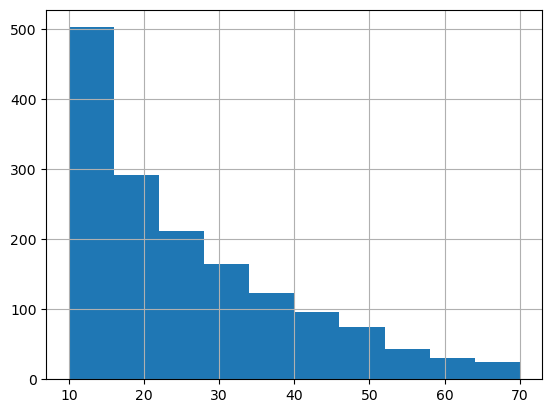

In [10]:
#Через модуль числа получим % изменения стоимости, дабы исключить совсем мелкие переоценки
def price_change(row):
    old_price = row['Цена :: Цена обычного магазина']
    new_price = row['Цена :: Цена обычного магазина new']
    change = (abs(old_price - new_price))/old_price
    return change*100
dump['Динамика'] = dump.apply(price_change, axis = 1)

# Построим диаграмму распределения, что бы установить пороговое значени
dump['Динамика'].hist(range = (10, 70), label = 'Динамика в процентах')
print('Создаем график')
os.chdir(r"C:\price_set\Done")
try:
    plt.savefig(f'Динамика {now}.png')
except: None
plt.show()


In [11]:
#Оставляем dump_filtered, что бы замерять динамику по ЦС
#alpha - Пороговое значение % изменения стоимости для переоценки
alpha = 20
dump_filtered = dump[dump['Динамика'] > alpha]

revaluation_list = dump_filtered.drop(columns = ['Название товара *','Производитель','Цена :: Цены интернет-магазина',
                                                'Цена :: Цена обычного магазина', 'Цена :: Цена премиум магазина', 
                                                 'Цена :: Балансовая стоимость', 'Цена :: Цена Кутузовский', 'Цена :: Цена Secrets',
                                                'ЦС', 'сцепка', 'Цена :: Цена Жуковка', 'Цена :: Цена Екатеринбург',
                                                'Цена :: Цена Пенза', 'black', 'to_sell', 'Цена Закупки', 'group_1',
                                                'Динамика', 'group_2'])
revaluation_list = revaluation_list.rename(
    columns = {'Цена :: Цена обычного магазина new' : 'Цена :: Цена обычного магазина',
               'Цена :: Цена премиум магазина new':'Цена :: Цена премиум магазина',
               'Цена :: Цена Кутузовский new':'Цена :: Цена Кутузовский',
               'Цена :: Цена Secrets new' : 'Цена :: Цена Secrets',
               'Цена :: Цена Жуковка new' : 'Цена :: Цена Жуковка',
               'Цена :: Цена Екатеринбург new' : 'Цена :: Цена Екатеринбург',
               'Цена :: Цена Пенза new': 'Цена :: Цена Пенза'
              }
)
print('Создаём файл переоценки')                                                      
revaluation_list.to_excel(f'Переоценка {now}.xlsx', index = False)


Создаём файл переоценки


In [12]:
# Вместе с переоценкой создадим сводную таблицу, для контроля цен
print('Создаем сводную по Ценовым Сегментам')
pivot = (dump_filtered.pivot_table(index = ['ЦС'], values = ['Цена :: Цена обычного магазина', 
                                                            'Цена :: Цена обычного магазина new'], 
                                  aggfunc=['mean'])
         .reset_index())

pivot.to_excel(f'Среднее по ЦС {now}.xlsx')

Создаем сводную по Ценовым Сегментам


In [13]:
print('Готово')

Готово


In [14]:
print(dump)

                                       Название товара *  # Товара  Артикул  \
199    36101 Anal Jewelry Plug Large Silver, зеленый....      4241    36101   
495    46333 Baci Lashes Premium, черный. Накладные р...      4591    46333   
522    46439 Baci Lashes Premium, черный. Накладные р...      4618    46439   
2513   40705 Baci трусики, зебра с черным. С широкой ...      6746    40705   
2913   14289 Bad Kitty Mundknebel, черный. Кляп небол...      7213    14289   
...                                                  ...       ...      ...   
39310  57903 Le Frivole Premium Костюм рабыни, черный...     81174    57903   
39311  57904 Le Frivole Premium Костюм рабыни, черный...     81175    57904   
39312  58821 Lola Take it Easy Best, розовое. Виброяй...     81176    58821   
39324  53318 Maxus Sensitive, 15 шт. Презервативы с ж...     81190    53318   
39325  53320 Maxus Classic, 15 шт. Презервативы с жел...     81191    53320   

           Производитель  Цена :: Цены интернет-маг